In [1]:
import sys

In [2]:
sys.path.append("./drive/My Drive/KannadaMNIST")

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from resnet import resnet18

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [5]:
train = pd.read_csv("./drive/My Drive/KannadaMNIST/train.csv")
test = pd.read_csv("./drive/My Drive/KannadaMNIST/test.csv")

In [6]:
train_copy = train.copy()

In [7]:
train_label = train["label"].copy()

In [8]:
train_img = train_copy.drop("label",axis=1)

In [9]:
images = np.array(train_img)
labels = np.array(train_label)

In [10]:
onehot = OneHotEncoder()

In [11]:
labels = onehot.fit_transform(labels.reshape([-1,1]))

In [12]:
labels = labels.A

In [13]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [14]:
# 加入批归一化层
x_train = x_train/255.0
x_test = x_test/255.0

In [15]:
x_train = tf.reshape(x_train,[-1,28,28,1])
x_test = tf.reshape(x_test, [-1,28,28,1])

In [16]:
x_train.shape

TensorShape([42000, 28, 28, 1])

In [17]:
y_train.shape

(42000, 10)

In [18]:
model = resnet18(im_height=28, im_width=28,channel=1,num_classes=10)

-----------------------------block_1-------------------------------------

data shape: (None, 7, 7, 64)
-----------------------------block_2-------------------------------------

data shape: (None, 7, 7, 64)
-----------------------------block_3-------------------------------------

data shape: (None, 4, 4, 128)
-----------------------------block_4-------------------------------------

data shape: (None, 2, 2, 256)


In [19]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 50))

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

In [21]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=optimizer,metrics=["accuracy"])

In [22]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 14, 64)        3136      
_________________________________________________________________
conv1/BatchNorm (BatchNormal (None, 14, 14, 64)        256       
_________________________________________________________________
re_lu (ReLU)                 (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
block_1 (Sequential)         (None, 7, 7, 64)          148480    
_________________________________________________________________
block_2 (Sequential)         (None, 4, 4, 128)        

In [23]:
history = model.fit(x_train,y_train,epochs=200,callbacks=[lr_schedule])

Epoch 1/200
1313/1313 [==============================] - 25s 19ms/step - loss: 0.4861 - accuracy: 0.8504
Epoch 2/200
1313/1313 [==============================] - 24s 18ms/step - loss: 0.1094 - accuracy: 0.9656
Epoch 3/200
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0568 - accuracy: 0.9818
Epoch 4/200
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0321 - accuracy: 0.9900
Epoch 5/200
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 6/200
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0166 - accuracy: 0.9950
Epoch 7/200
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 8/200
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0098 - accuracy: 0.9970
Epoch 9/200
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0101 - accuracy: 0.9967
Epoch 10/200
1313/1313 [==============================]

(1e-05, 0.1, 0.0, 0.02)

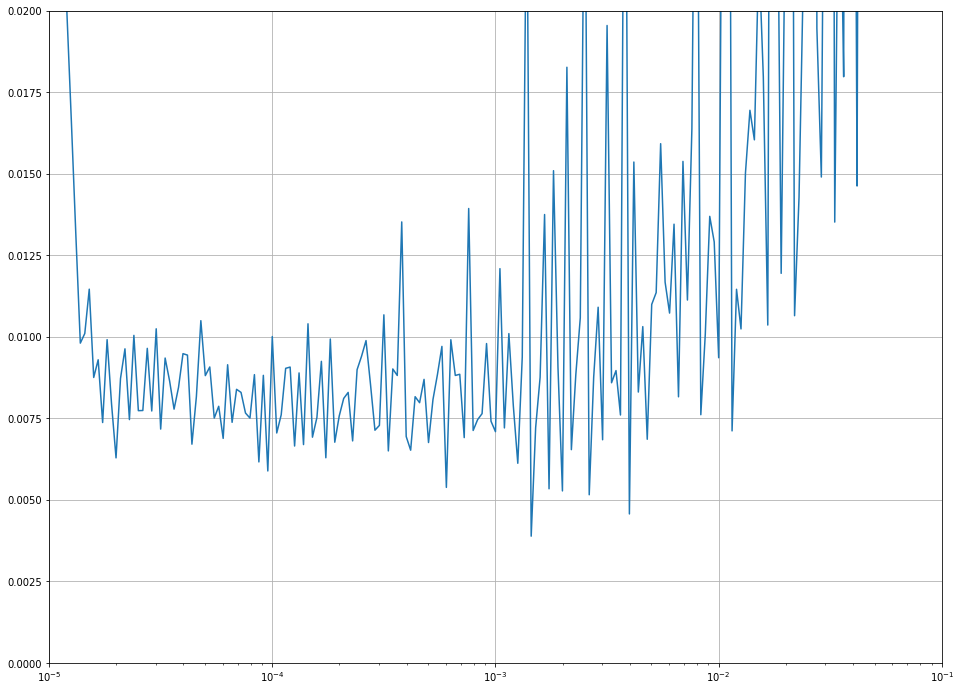

In [25]:
plt.figure(figsize=(16,12))
plt.semilogx(history.history["lr"],history.history["loss"])
plt.grid(True)
plt.axis([1e-5,1e-1,0,0.02])

In [26]:
tf.keras.backend.clear_session()

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-5)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=optimizer,metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0436 - accuracy: 0.9906
Epoch 2/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0518 - accuracy: 0.9908
Epoch 3/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0487 - accuracy: 0.9907
Epoch 4/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0374 - accuracy: 0.9922
Epoch 5/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0422 - accuracy: 0.9914
Epoch 6/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0438 - accuracy: 0.9913
Epoch 7/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0364 - accuracy: 0.9915
Epoch 8/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0388 - accuracy: 0.9924
Epoch 9/10
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0393 - accuracy: 0.9917
Epoch 10/10
1313/1313 [==============================] - 24s 18m

In [28]:
valid_lose = model.evaluate(x_test, y_test)

563/563 [==============================] - 3s 5ms/step - loss: 0.0579 - accuracy: 0.9907


In [29]:
test_copy = test.copy()

In [30]:
test_images= test_copy.drop("id",axis=1)

In [31]:
test_images = test_images/255.0

In [32]:
test_images = tf.reshape(test_images,[-1,28,28,1])

In [33]:
test_ret = model.predict(test_images)

In [34]:
test_ret.shape

(5000, 10)

In [35]:
test_ret

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.5903147e-38,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.2634182e-27, 1.1836914e-27, ..., 1.3968577e-29,
        0.0000000e+00, 7.1364902e-38],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.2222329e-13, 1.0000000e+00, 5.1478793e-36, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.0760118e-11,
        0.0000000e+00, 7.0030768e-16],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0130157e-30,
        8.2817591e-38, 0.0000000e+00]], dtype=float32)

In [36]:
predict = tf.argmax(test_ret,1)

In [37]:
predict = predict.numpy()

In [38]:
sunmission = pd.DataFrame({'id': test.id,'label': predict})

In [39]:
sunmission.to_csv("./drive/My Drive/KannadaMNIST/submission_bn.csv",index=False)

In [40]:
dig = pd.read_csv("./drive/My Drive/KannadaMNIST/Dig-MNIST.csv")

In [41]:
dig.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
dig_copy = dig.copy()

In [43]:
dig_images = dig_copy.drop("label",axis=1)

In [44]:
dig_images = dig_images/255.0

In [45]:
dig_images = tf.reshape(dig_images,[-1,28,28,1])

In [46]:
dig_labels = dig_copy["label"].copy()

In [47]:
dig_labels = np.array(dig_labels)

In [48]:
dig_labels = onehot.fit_transform(dig_labels.reshape([-1,1]))

In [49]:
dig_labels = dig_labels.A

In [50]:
dig_labels.shape

(10240, 10)

In [51]:
dig_images = dig_images.numpy()

In [52]:
dig_loss = model.evaluate(dig_images,dig_labels)

320/320 [==============================] - 2s 5ms/step - loss: 3.3960 - accuracy: 0.7313
